In [1]:
 # Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.keras.__version__
import tensorflow as tf


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets

In [3]:
cc_df = pd.read_csv('Credit_Data_Original.csv', encoding = 'utf8')


In [4]:
cc_df.dropna()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,0
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,1
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,0
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,0
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,...,31,0,0,1,1,1,1,0,0,0
996,997,0,30,2,0,1,0,0,0,0,...,40,0,0,1,1,3,1,1,0,0
997,998,3,12,2,0,0,0,1,0,0,...,38,0,0,1,1,2,1,0,0,0
998,999,0,45,2,0,0,0,1,0,0,...,23,0,0,0,1,2,1,1,0,1


In [5]:
cc_df.drop("OBS#", axis=1)


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,0
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,1
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,0
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,0
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,0,0,1,0,0,0,1736,...,31,0,0,1,1,1,1,0,0,0
996,0,30,2,0,1,0,0,0,0,3857,...,40,0,0,1,1,3,1,1,0,0
997,3,12,2,0,0,0,1,0,0,804,...,38,0,0,1,1,2,1,0,0,0
998,0,45,2,0,0,0,1,0,0,1845,...,23,0,0,0,1,2,1,1,0,1


In [6]:
X = cc_df.drop("DEFAULT", axis=1)
y = cc_df["DEFAULT"]
print(X.shape, y.shape)

(1000, 31) (1000,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25)

In [9]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [11]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [12]:
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=31))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [14]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 13,502
Trainable params: 13,502
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Train on 750 samples
Epoch 1/50
750/750 - 1s - loss: 0.5902 - accuracy: 0.7000
Epoch 2/50
750/750 - 0s - loss: 0.5214 - accuracy: 0.7267
Epoch 3/50
750/750 - 0s - loss: 0.4839 - accuracy: 0.7733
Epoch 4/50
750/750 - 0s - loss: 0.4577 - accuracy: 0.7880
Epoch 5/50
750/750 - 0s - loss: 0.4451 - accuracy: 0.7933
Epoch 6/50
750/750 - 0s - loss: 0.4356 - accuracy: 0.7907
Epoch 7/50
750/750 - 0s - loss: 0.4167 - accuracy: 0.7960
Epoch 8/50
750/750 - 0s - loss: 0.4066 - accuracy: 0.8053
Epoch 9/50
750/750 - 0s - loss: 0.3946 - accuracy: 0.8360
Epoch 10/50
750/750 - 0s - loss: 0.3810 - accuracy: 0.8373
Epoch 11/50
750/750 - 0s - loss: 0.3699 - accuracy: 0.8413
Epoch 12/50
750/750 - 0s - loss: 0.3519 - accuracy: 0.8453
Epoch 13/50
750/750 - 0s - loss: 0.3401 - accuracy: 0.8573
Epoch 14/50
750/750 - 0s - loss: 0.3335 - accuracy: 0.8587
Epoch 15/50
750/750 - 0s - loss: 0.3170 - accuracy: 0.8747
Epoch 16/50
750/750 - 0s - loss: 0.3112 - accuracy: 0.8787
Epoch 17/50
750/750 - 0s - loss: 0.2877 - ac

In [17]:
print(f"Normal Neural Network ")
print('-----------------------')
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)


Normal Neural Network 
-----------------------
250/250 - 0s - loss: 1.1550 - accuracy: 0.7320


In [18]:
# SAFE MODEL!!!
 
model.save("DEFAULT_model_trained.h5")

In [19]:
# RELOAD!!!!! MODEL!!! YAYYYYY!!
from tensorflow.keras.models import load_model

default_model = load_model("DEFAULT_model_trained.h5")

In [20]:
print(f"Better Check that Normal Neural Network!! Twice! ")
print('-------------------------------------------------')
model_loss, model_accuracy = default_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)

Better Check that Normal Neural Network!! Twice! 
-------------------------------------------------
250/250 - 0s - loss: 1.1550 - accuracy: 0.7320


In [21]:
# Predicting Default OUTCOMES
encoded_predictions = default_model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [22]:
print(f"DEFAULT OUTCOME KEY: (DEFAULT YES: 1 , DEFAULt NO: 0 )")
print(f"------------------------------------------------------")
print(f"Predicted Outcome: {prediction_labels}")
print(f"Actual Outcome: {list(y_test[:])}")

DEFAULT OUTCOME KEY: (DEFAULT YES: 1 , DEFAULt NO: 0 )
------------------------------------------------------
Predicted Outcome: [0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0]
Actual Outcome: [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1

In [23]:
#SAVE VARIABLES TO PLOT 

X_predict = prediction_labels
print(X_predict)
Actual_Outcome= list(y_test[:])
print(Actual_Outcome)

[0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [24]:
approval_df =pd.DataFrame({"Prediction Acct Default": X_predict, "Actual Acct Default": Actual_Outcome}).reset_index(drop=True)
approval_df

,Prediction Acct Default,Actual Acct Default
0,0,1
1,1,0
2,0,0
3,1,1
4,1,1
...,...,...
245,0,0
246,1,0
247,0,1
248,0,0


In [25]:
approval_df["Approval_Status"] =""
approval_df

,Prediction Acct Default,Actual Acct Default,Approval_Status
0,0,1,
1,1,0,
2,0,0,
3,1,1,
4,1,1,
...,...,...,...
245,0,0,
246,1,0,
247,0,1,
248,0,0,


In [26]:
def Approval_Status(c):
    if c['Prediction Acct Default'] & c['Actual Acct Default']== 1:
        return 'Denied'
    elif c['Prediction Acct Default'] | c['Actual Acct Default']== 0:
        return 'Approved'
    else:
        return 'Pending Further Analysis'

In [27]:
approval_df["Approval_Status"] =approval_df.apply(Approval_Status,axis=1)
approval_df.head(20)

,Prediction Acct Default,Actual Acct Default,Approval_Status
0,0,1,Pending Further Analysis
1,1,0,Pending Further Analysis
2,0,0,Approved
3,1,1,Denied
4,1,1,Denied
5,1,0,Pending Further Analysis
6,1,0,Pending Further Analysis
7,0,0,Approved
8,0,0,Approved
9,0,0,Approved


In [28]:
statusValueCount= approval_df["Approval_Status"].value_counts()
statusValueCount

Approved                    142
Pending Further Analysis     67
Denied                       41
Name: Approval_Status, dtype: int64

In [29]:
totalStatusOutcome = len(approval_df["Approval_Status"])
totalStatusOutcome

250

In [30]:
statusOutcomeRatio = statusValueCount/ totalStatusOutcome
statusOutcomeRatio 

Approved                    0.568
Pending Further Analysis    0.268
Denied                      0.164
Name: Approval_Status, dtype: float64

In [31]:
statusRatio_df =pd.DataFrame({"Total Predictive Outcomes":statusValueCount,"Percentage Predictive Outcomes":statusOutcomeRatio})
statusRatio_df

,Total Predictive Outcomes,Percentage Predictive Outcomes
Approved,142,0.568
Pending Further Analysis,67,0.268
Denied,41,0.164


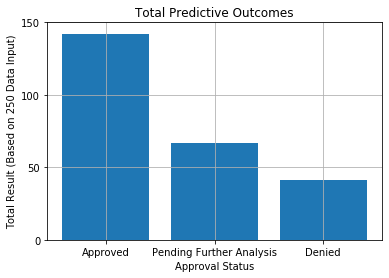

In [32]:
statusLabel =["Approved","Pending Further Analysis","Denied"]

totals= statusRatio_df['Total Predictive Outcomes']

plt.bar(statusLabel,totals)

# Orient widths. Add labels, tick marks, etc. 
plt.yticks(np.arange(0,200,50))
plt.title("Total Predictive Outcomes")
plt.xlabel("Approval Status")
plt.ylabel("Total Result (Based on 250 Data Input)")
plt.grid()

# Save the Figure
plt.savefig("PNG_SimpleBar.png")

# Show the Figure
plt.show()

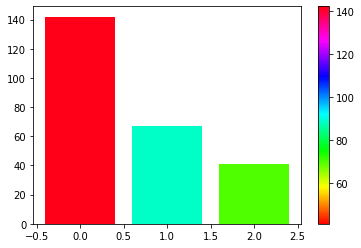

In [33]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand

colors = cm.hsv(totals / float(max(totals)))
plot = plt.scatter(totals, totals, c = totals, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(range(len(totals)), totals, color = colors)

plt.savefig("PNG_ColorRadiantBar.png")

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

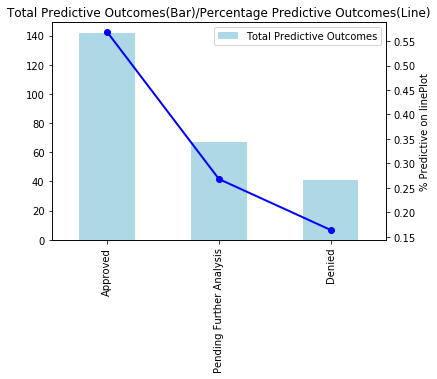

In [34]:
# two y-axes, using twinx()

# statusRatio_df[["Total Predictive Outcomes","Percentage Predictive Outcomes"]].plot(kind='bar', use_index=True)
# statusRatio_df[["Total Predictive Outcomes","Percentage Predictive Outcomes"]].plot(kind='line', use_index=True)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = statusRatio_df[["Total Predictive Outcomes"]].plot(kind='bar',color= "lightblue", use_index=True)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         statusRatio_df[["Percentage Predictive Outcomes"]].values,
         linestyle='-',
         marker='o', linewidth=2.0,color= "blue")
# Orient widths. Add labels, tick marks, etc. 

plt.title("Total Predictive Outcomes(Bar)/Percentage Predictive Outcomes(Line)")
plt.xlabel("Approval Status")
plt.ylabel("% Predictive on linePlot")
plt.xticks(rotation=70)
# plt.savefig("PNG_barChart_lineChart_2axesForY.png")

In [35]:
statusOutcomeRatio_asObject = ((statusValueCount/ totalStatusOutcome)*100).round(1).astype(str) + '%' 
statusOutcomeRatio_asObject

Approved                    56.8%
Pending Further Analysis    26.8%
Denied                      16.4%
Name: Approval_Status, dtype: object

In [36]:
statusRatio_prettyDF =pd.DataFrame({"Total Predictive Outcomes":statusValueCount,"Percentage Predictive Outcomes":statusOutcomeRatio_asObject})


print('                 AGGREGATED PREDICTIVE OUTCOMES DataFrame')
print('                _________________________________________')
statusRatio_prettyDF

                 AGGREGATED PREDICTIVE OUTCOMES DataFrame
                _________________________________________


,Total Predictive Outcomes,Percentage Predictive Outcomes
Approved,142,56.8%
Pending Further Analysis,67,26.8%
Denied,41,16.4%
